In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [122]:
test_data=pd.read_csv('bigdatamart_Test.csv')
train_data=pd.read_csv('bigdatamart_Train.csv')

In [123]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [124]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [125]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [126]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [127]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [128]:
train_data['Outlet_Size'].fillna('Medium',inplace=True)

In [129]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [130]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [131]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)

In [132]:
test_data['Outlet_Size'].fillna('Medium',inplace=True)

In [133]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

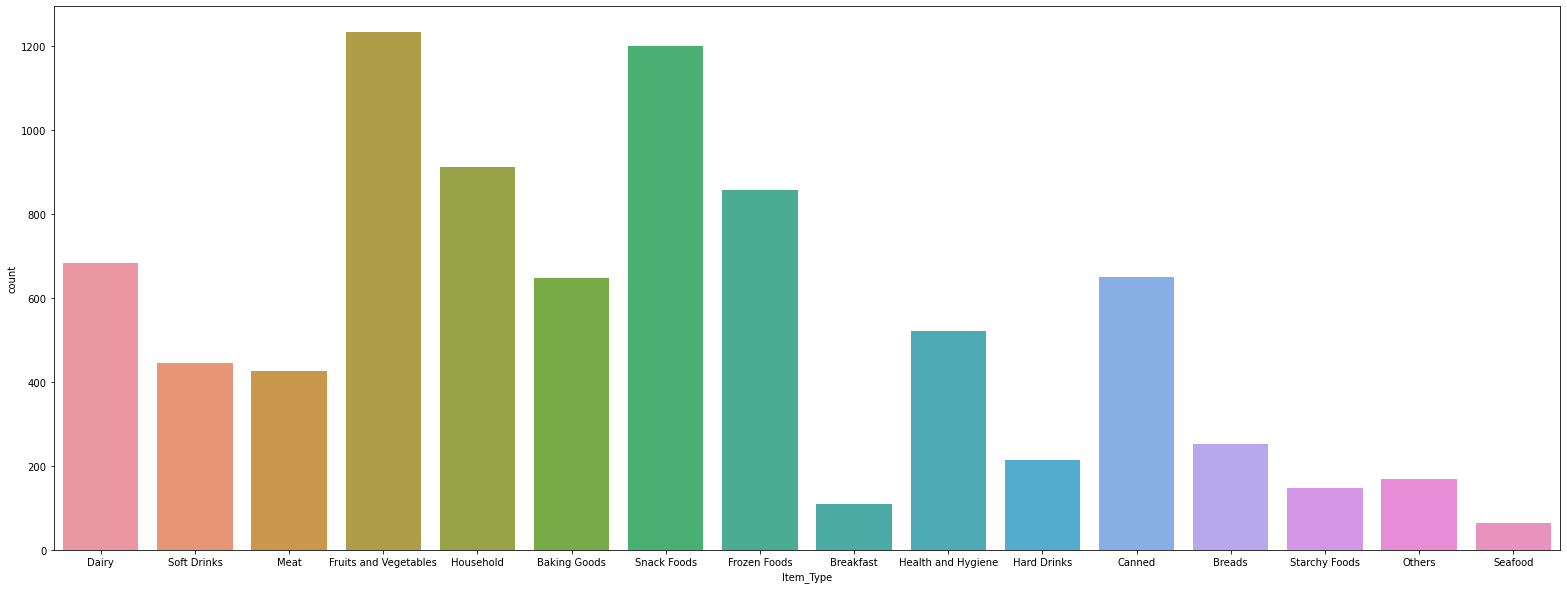

In [134]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train_data)
plt.xlabel('Item_Type')
plt.show()


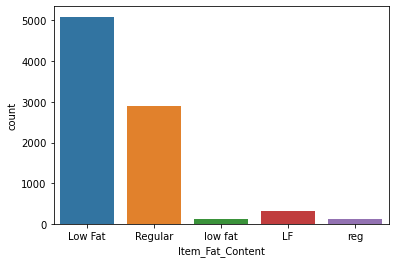

In [135]:
plt.figure()
sns.countplot(x='Item_Fat_Content',data=train_data)
plt.xlabel('Item_Fat_Content')
plt.show()

In [138]:
train_data['Item_Fat_Content'].replace(['LF','low fat','reg'],
                                        ['LowFat','Low Fat','Regular'],inplace=True)

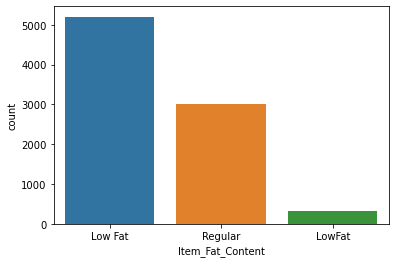

In [139]:
plt.figure()
sns.countplot(x='Item_Fat_Content',data=train_data)
plt.xlabel('Item_Fat_Content')
plt.show()

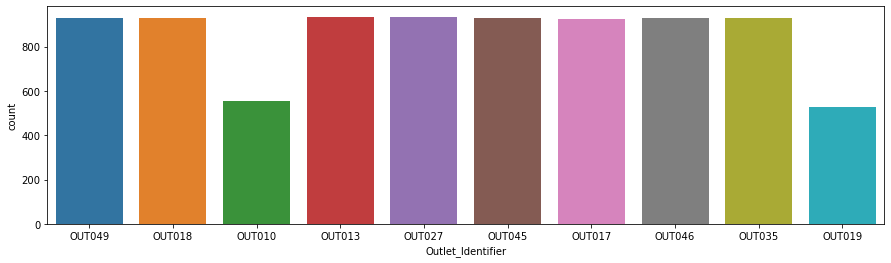

In [140]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier',data=train_data)
plt.xlabel('Outlet_Identifier')
plt.show()

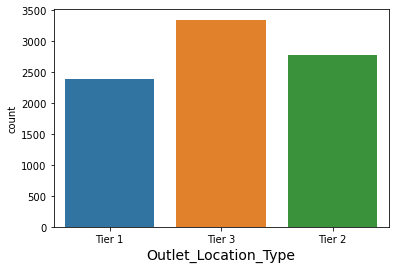

In [141]:
plt.figure()
sns.countplot(x='Outlet_Location_Type' , data=train_data)
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

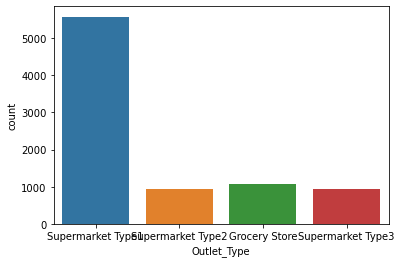

In [142]:
plt.figure()
sns.countplot(x='Outlet_Type' , data=train_data)
plt.xlabel('Outlet_Type')
plt.show()


<AxesSubplot:>

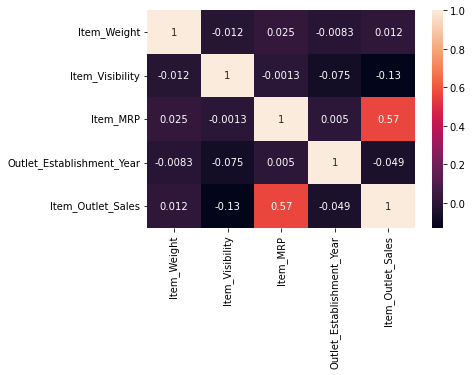

In [143]:
sns.heatmap(train_data.corr(),annot=True)

In [144]:
le=LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train_data[i]=le.fit_transform(train_data[i])
    test_data[i]=le.fit_transform(test_data[i])
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


In [145]:
train_data['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [146]:
train_data['Item_Fat_Content'].value_counts()

0    5201
2    3006
1     316
Name: Item_Fat_Content, dtype: int64

In [149]:
train_data['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [163]:
cols = ['Item_Type','Outlet_Type']
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train_data[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.fit_transform(test_data[cols])).astype('int64')
train_oh

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [160]:
train_oh.columns = OH_encoder.get_feature_names()
test_oh.columns = OH_encoder.get_feature_names()
tr_oh

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [161]:
train_oh.index = train_data.index
test_oh.index = test_data.index



In [185]:

tr_fe = pd.concat([train_data, tr_oh], axis=1)
te_fe = pd.concat([test_data, te_oh], axis=1)
tr_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,...,0,0,0,0,0,0,0,1,0,0


In [186]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [187]:
tr_fe

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,2,0.019278,48.2692,1,2,443.4228,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1,0,2097.2700,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.200,2,0.000000,182.0950,1,2,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,0,2,994.7052,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,2778.3834,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,8.380,2,0.046982,108.1570,1,1,549.2850,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2,1,1193.1136,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,2,0.145221,103.1332,1,2,1845.5976,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [167]:
from sklearn.model_selection import train_test_split

In [174]:
y = tr_fe['Item_Outlet_Sales']
x = tr_fe.drop('Item_Outlet_Sales', axis = 1)

In [179]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 30)

In [171]:
from sklearn.linear_model import LinearRegression

In [177]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [188]:
y_pred=lm.predict(x_test)

In [ ]:
from sklearn import metrics

In [189]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score

In [192]:
lm_mae=mean_absolute_error(y_test,y_pred)

In [193]:
lm_mse=mean_squared_error(y_test,y_pred)

In [195]:
lm_r2=r2_score(y_test,y_pred)

In [198]:
print('Mean_Absolute_error is:',lm_mae)
print('mean_Square_Error is:',lm_mse)
print('R^2 Score is:',lm_r2)

Mean_Absolute_error is: 849.2584991115224
mean_Square_Error is: 1306615.534514219
R^2 Score is: 0.5558154814552729
